In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/content/drive/MyDrive/code_one/pd_cook_data')

In [3]:
flights = pd.read_csv('flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [4]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

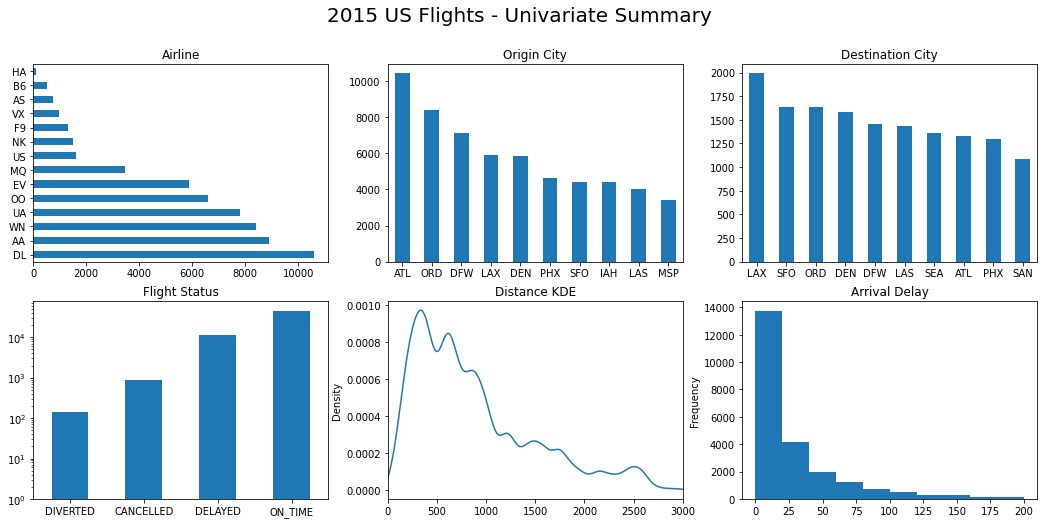

In [15]:
fig, ax_array = plt.subplots(2, 3, figsize=(18, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title='Airline' )

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title = 'Destination City')

status.plot(kind='bar', ax=ax4, rot=0,
            log=True, title='Flight Status')
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),
                     title='Distance KDE')
flights['ARR_DELAY'].plot(kind='hist', ax=ax6, title='Arrival Delay', range=(0,200))

In [16]:
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [17]:
flights_dep = pd.to_datetime(df_date)
flights_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

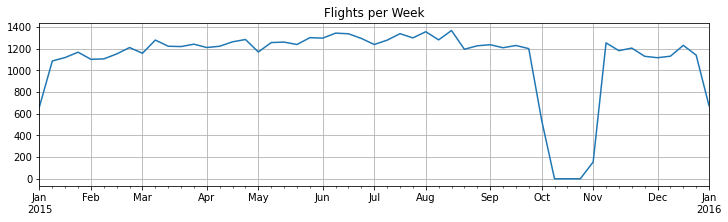

In [20]:
flights.index = flights_dep
fc = flights.resample('W').size()
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)

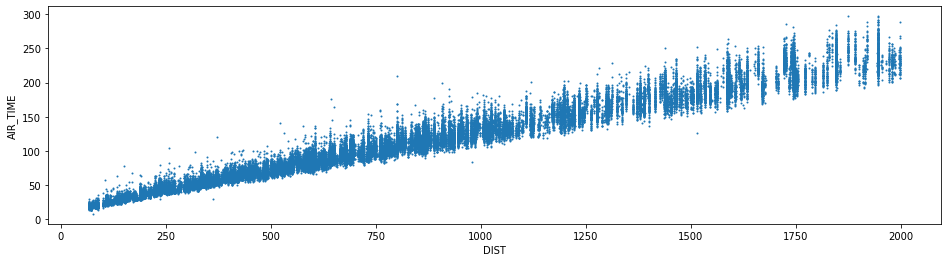

In [22]:
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y= 'AIR_TIME', kind='scatter', s=1, figsize=(16,4))

In [23]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [24]:
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'].transform(normalize)
fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

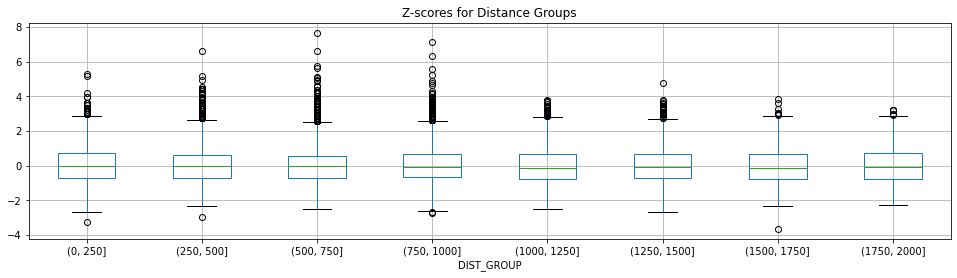

In [27]:
ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE',
                figsize=(16,4))
ax.set_title('Z-scores for Distance Groups')
ax.figure.suptitle('')

In [29]:
os.listdir()

['college_data_dictionary.csv',
 'employee.csv',
 'weight_loss.csv',
 'baseball14.csv',
 'stocks_2016.csv',
 'aapl_stock.csv',
 'college_diversity.csv',
 'slb_stock.csv',
 'denver_neighborhood_pop.csv',
 'weightlifting_women.csv',
 'diamonds.csv',
 'names.csv',
 'movie.csv',
 'state_fruit.csv',
 'food_transactions.csv',
 'stocks_2017.csv',
 'food_prices.csv',
 'state_fruit2.csv',
 'denver_neigh_pop.csv',
 'sensors.csv',
 'meetup_groups.csv',
 'movie_altered.csv',
 'chinook.db',
 'weightlifting.csv',
 'baseball16.csv',
 'baseball15.csv',
 'denver_pop.csv',
 'crime.h5',
 'restaurant_inspections.csv',
 'amzn_stock.csv',
 'flights.csv',
 'college.csv',
 'texas_cities.csv',
 'stocks_2018.csv',
 'weightlifting_men.csv',
 'stackme.csv',
 'backup',
 'gas prices',
 'descriptions']

In [30]:
meetup = pd.read_csv('meetup_groups.csv', parse_dates=['join_date'], 
                     index_col='join_date')
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [32]:
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64